In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from matplotlib.ticker import FuncFormatter

In [3]:
dataset = pd.read_csv('drive/MyDrive/DS_Colab_Work/Parkinson Disease/Dataset/parkinsons.data')

In [4]:
dataset.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Description of attributes given in the data<br>**
**name** - ASCII subject name and recording number<br>

**MDVP:Fo(Hz)** - Average vocal fundamental frequency<br>

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency<br>

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency<br>

**MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP**- Several measures of variation in fundamental frequency<br>

**MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA** - Several measures of variation in amplitude<br>

**NHR , HNR** - Two measures of ratio of noise to tonal components in the voice<br>

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy<br>

**RPDE , D2** - Two nonlinear dynamical complexity measures<br>
**DFA** - Signal fractal scaling exponent<br>
**spread1 , spread2 , PPE** - Three nonlinear measures of fundamental frequency variation

## **Data Information & Statistical Summary**

In [5]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    

**Checking Missing Values**

<Axes: >

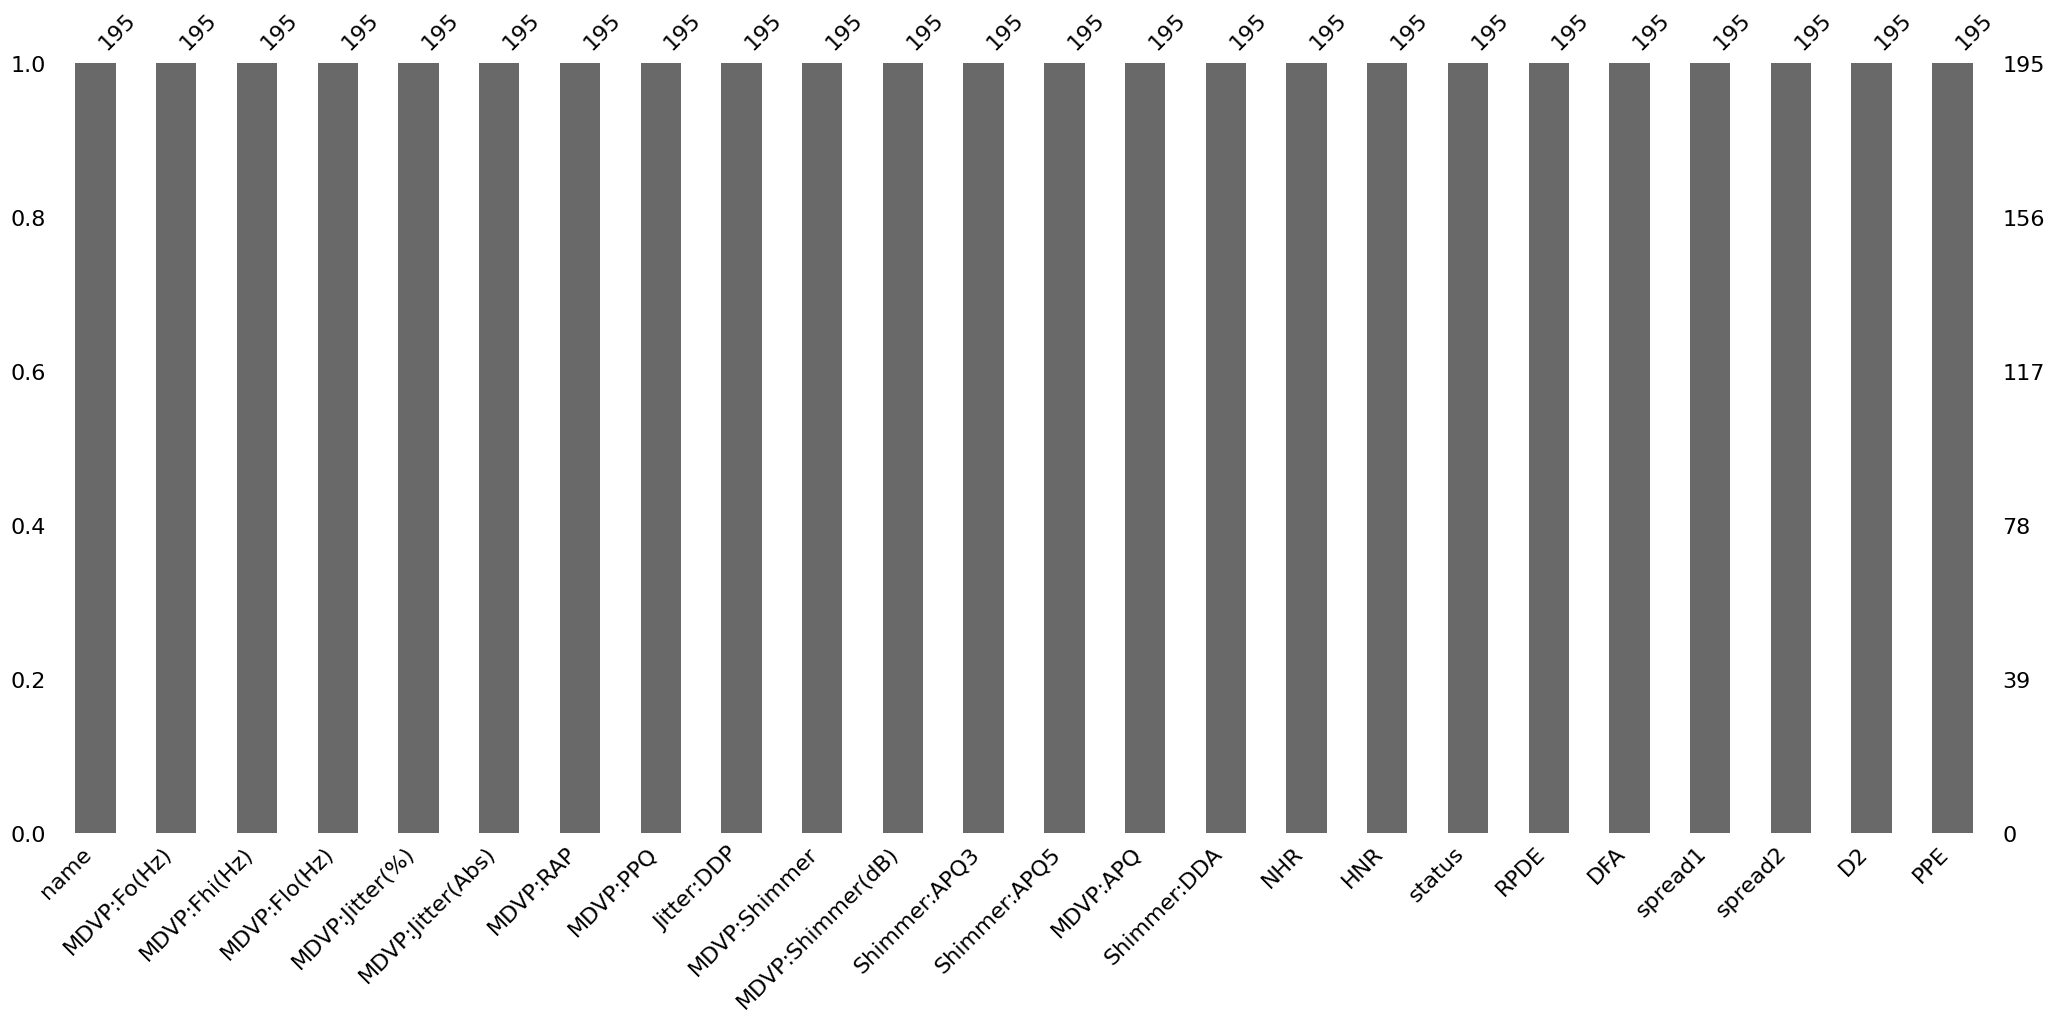

In [6]:
msno.bar(dataset)

**OBSERVATION:** We can see above there is no null values or missing values in the dataset. To confirm we can check with "isnull" method.

In [7]:
dataset.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**OBSERVATION:** Now it is confirmed that there is no null or missing values in the dataset.

## **Feature Engineering & Exploratory Data Analysis**

In [8]:
categorical_cols=dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Columns in the dataset:")
print(categorical_cols)
print("Numerical Columns in the dataset:")
print(numerical_cols)

Categorical Columns in the dataset:
Index(['name'], dtype='object')
Numerical Columns in the dataset:
['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


**Observation**: Dataset has only one categorical variable and rest all numerical variables. We will drop the only categorical variable

In [9]:
dataset.drop(columns = 'name', inplace=True)

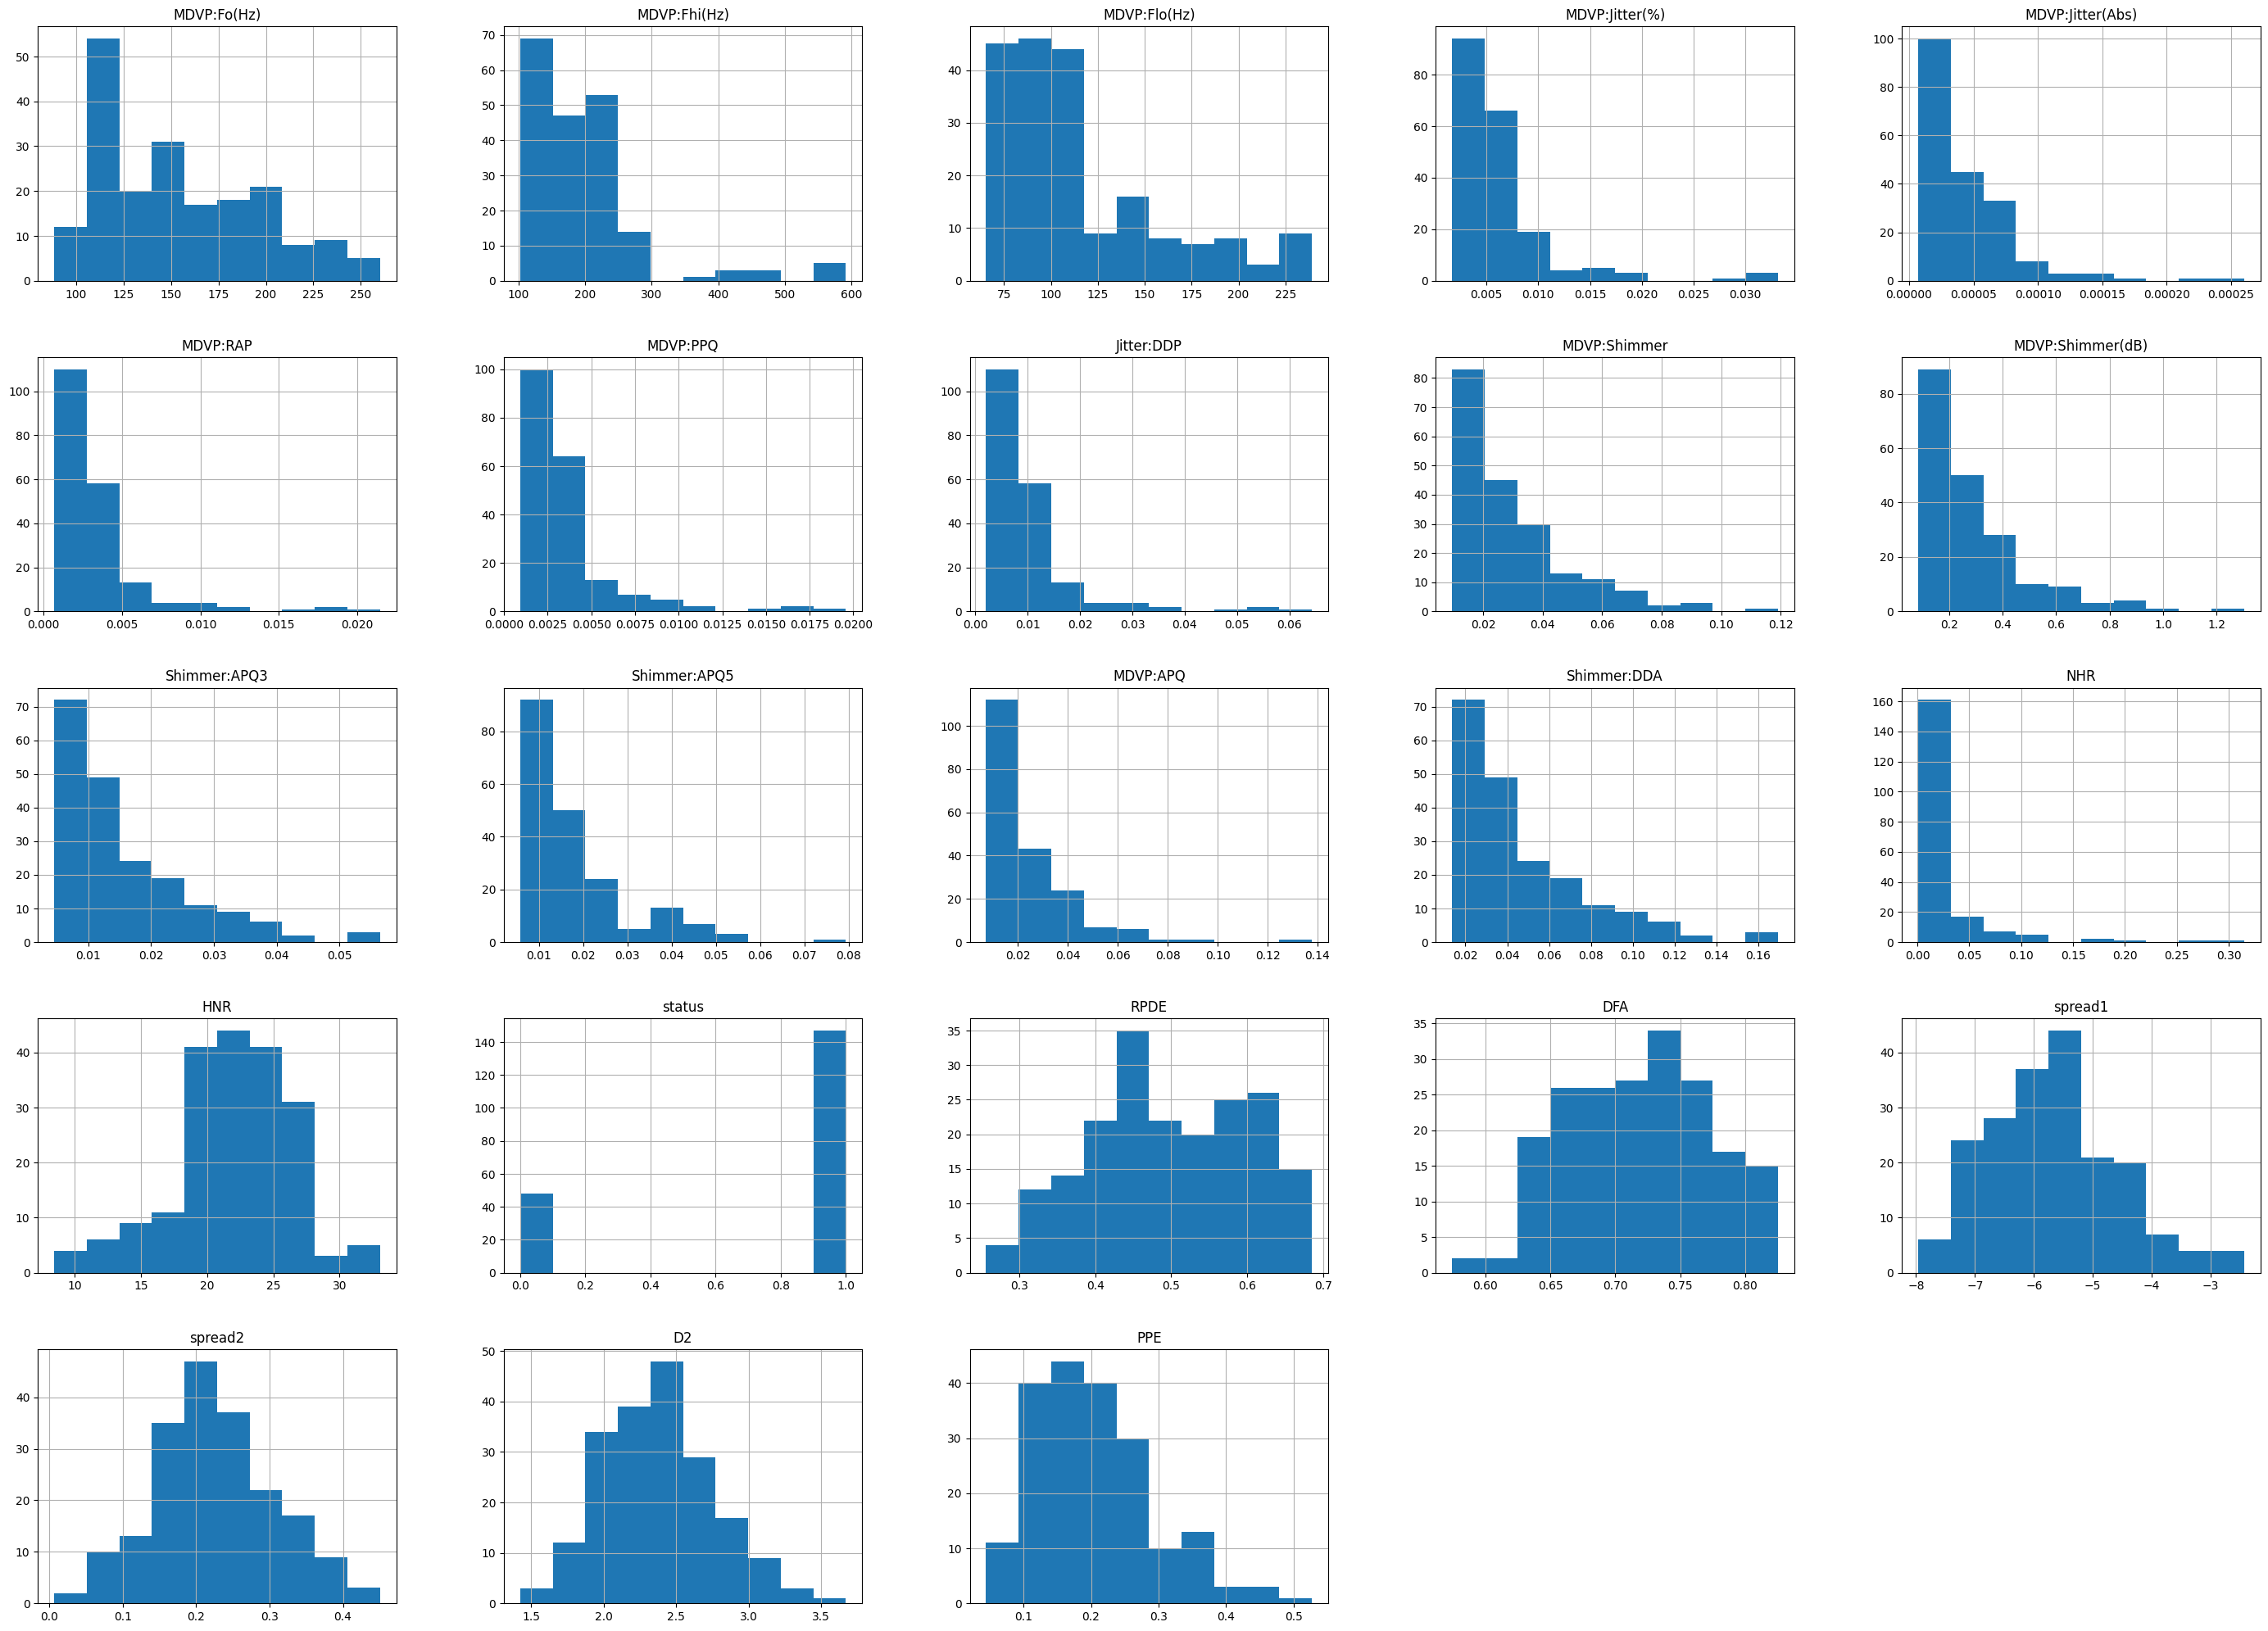

In [10]:
dataset.hist(figsize = (35, 25));

In [11]:
unique_status = dataset['status'].value_counts();

print(unique_status)

1    147
0     48
Name: status, dtype: int64


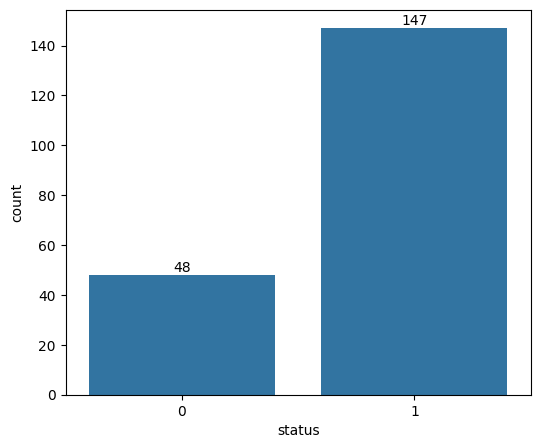

In [12]:
plt.figure(figsize=(6,5))
ax = sns.countplot(dataset, x='status');
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [13]:
def pie_chart_config(chart_name, len_values='', color_map=''):
  pc_config = dict(
      fontsize   = 6,
      figsize    = (60,5),
      autopct    = '%1.1f%%'
    )
  pc_config['title'] = chart_name
  if color_map:
    pc_config['colormap'] = color_map
  if len_values:
    pc_config['explode'] = [0.1]*len_values

  return pc_config

<Axes: title={'center': 'Category Distribution - Status'}, ylabel='status'>

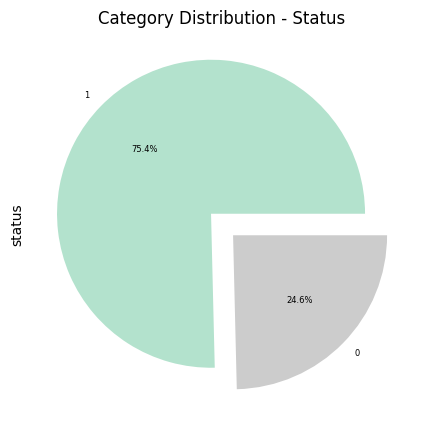

In [14]:
category_config = pie_chart_config('Category Distribution - Status', color_map='Pastel2', len_values=2) # category has 5 unique values and we would like to plot all.
dataset['status'].value_counts().plot.pie(**category_config)

**Correlation & Skewness**

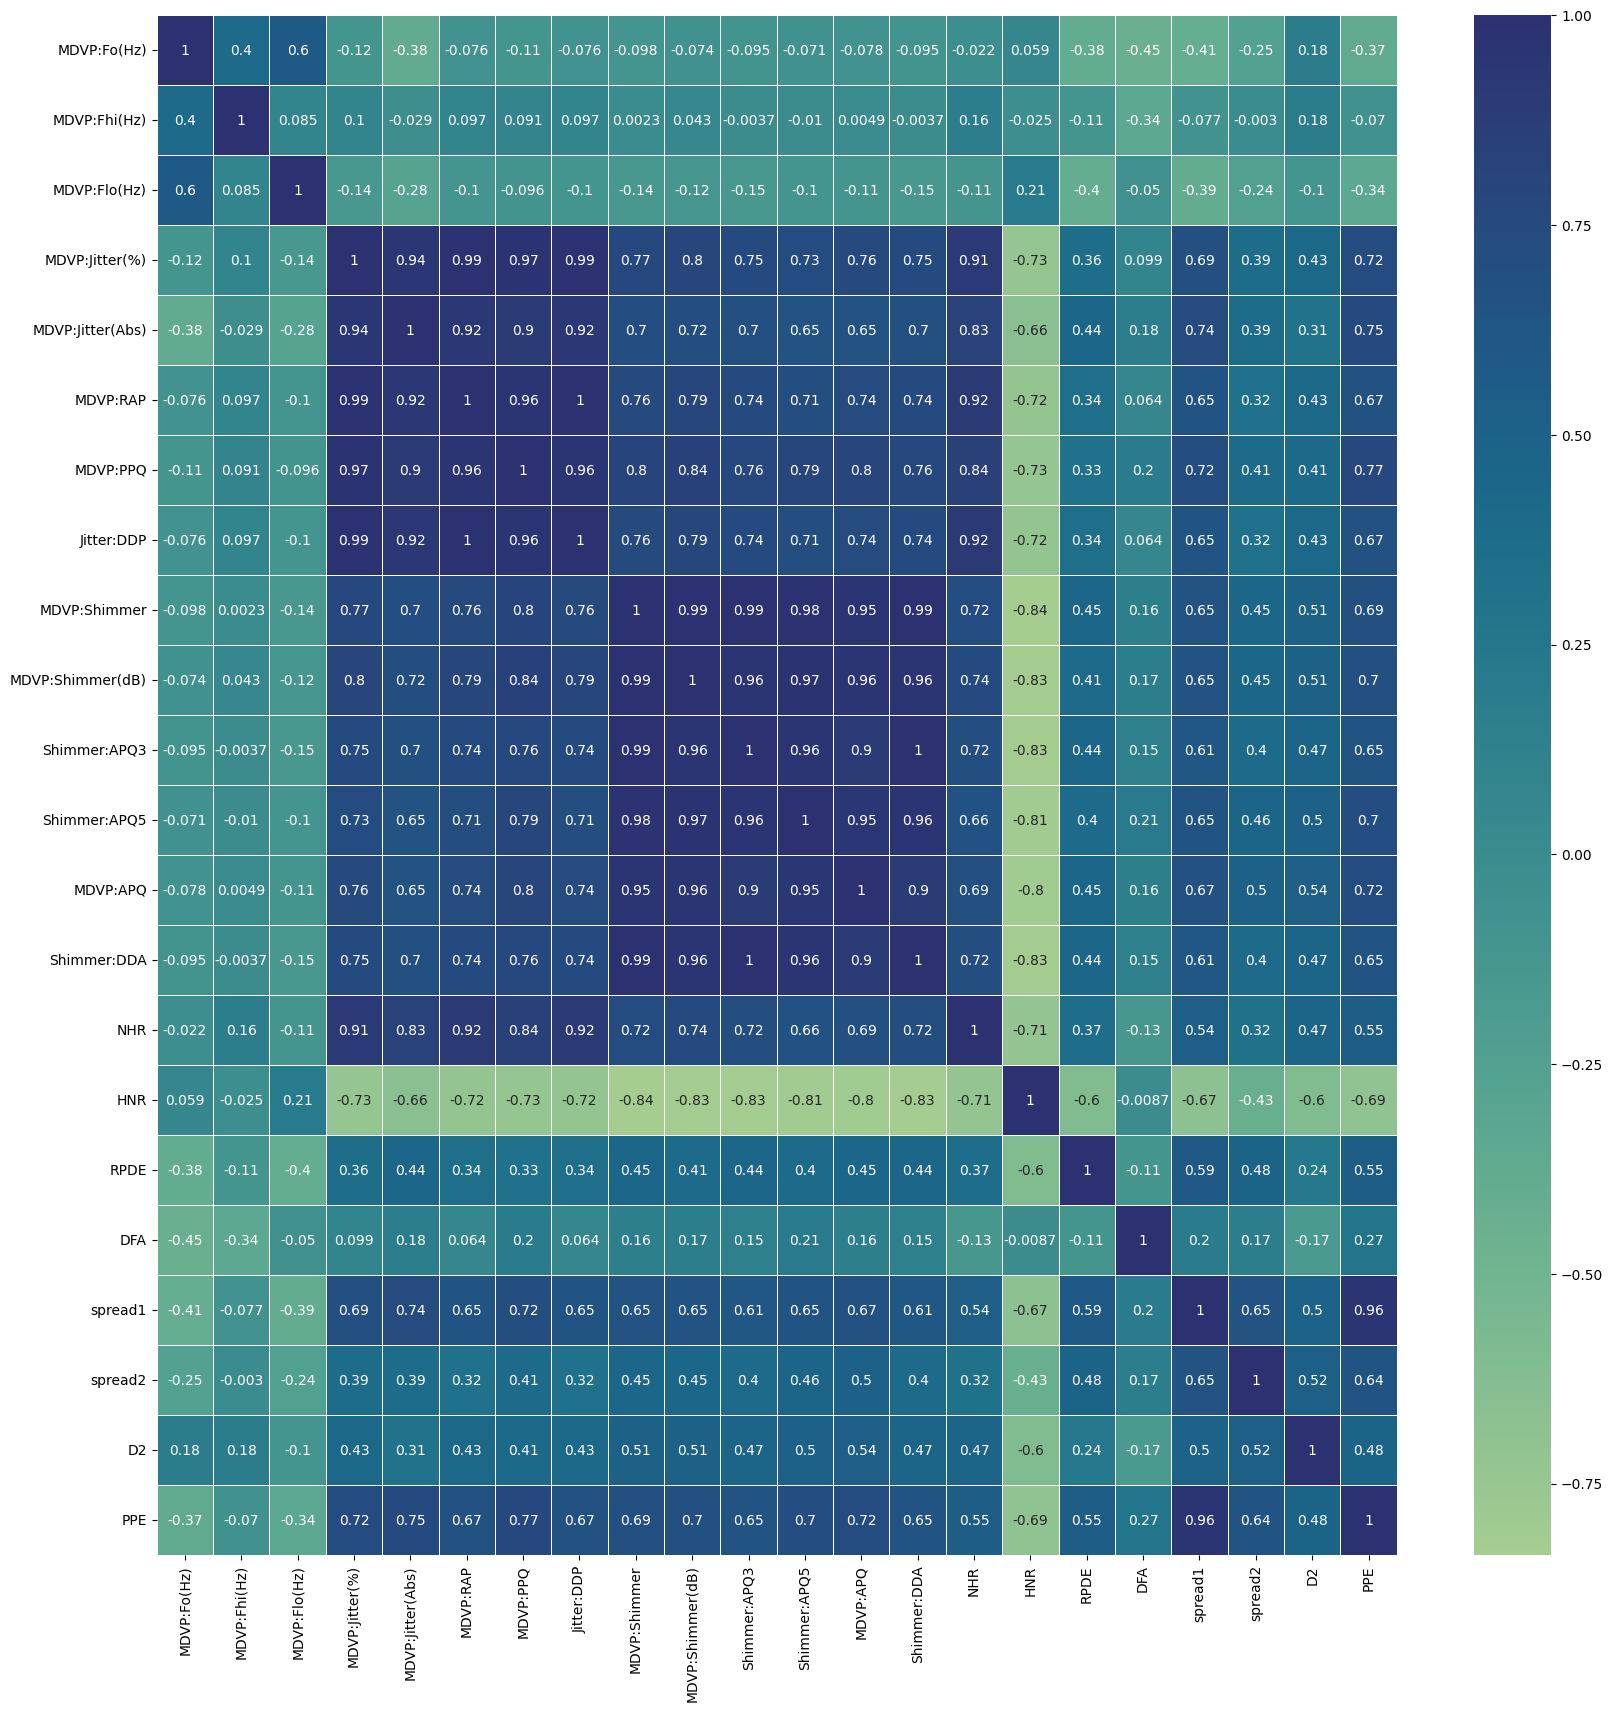

In [15]:
correlation =dataset.drop(columns='status').corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap='crest', linewidth=.5)
plt.show()

In [16]:
dataset.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

## **MODELING**

**Importing required ML libraries**

In [17]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import  ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [18]:
def Models(models):

    model = models
    X = dataset.drop(columns=['status']).values
    y = dataset['status'].values
    scaler=MinMaxScaler((-1,1))
    X=scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def cm_plot(actual, predicted):
  confusion_matrix = metrics.confusion_matrix(actual, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

  cm_display.plot()
  plt.show()


In [19]:
X = dataset.drop(columns=['status']).values
y = dataset['status'].values
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)
y=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

classifiers = [['DecisionTreeClassifier',DecisionTreeClassifier()],
              ['XGBClassifier', XGBClassifier()],
              ['MLPClassifier',MLPClassifier()],
              ['AdaBoostClassifier',AdaBoostClassifier()],
              ['ExtraTreesClassifier',ExtraTreesClassifier()],
              ['GradientBoostingClassifier',GradientBoostingClassifier()]]
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])
for mod in classifiers:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f1_scores = f1_score(y_test, y_pred)*100
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)*100
    ATeS = model.score(X_test,y_test)*100
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS, 'F1 Score':f1_scores}),ignore_index=True )

In [20]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set,F1 Score
3,AdaBoostClassifier,0.531085,100.000000,71.794872,80.701754
2,MLPClassifier,0.452911,88.461538,79.487179,86.666667
0,DecisionTreeClassifier,0.423659,100.000000,82.051282,87.272727
4,ExtraTreesClassifier,0.392232,100.000000,84.615385,89.655172
5,GradientBoostingClassifier,0.392232,100.000000,84.615385,89.655172
1,XGBClassifier,0.320256,100.000000,89.743590,93.103448


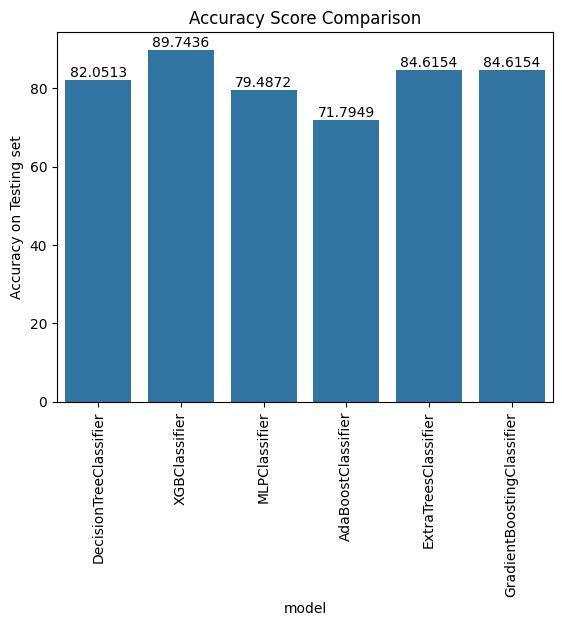

In [21]:
#Comparing all machine learning algorithm accuracy score by using bar plot.
ax = sns.barplot(data= Acc, x="model", y="Accuracy on Testing set")
ax.set_title('Accuracy Score Comparison')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.4f}'.format(p.get_height()),
        fontsize=10, color='black', ha='center', va='bottom')


### **Comparing F1 scores**

**Conclusion:** With above accuracy score and F1 score charts, we can see the algorithms like Decision Tree, ExtraTrees & GradientBoosting are giving us closer results whereras MLP & AdaBoost have very low performance on this dataset. This shows picking up the right model is very important for prediction. However, with better performance Xgboost giving us maximum F1 score and Accuracy score.